# Linear Regression in PyTorch
<img src="resources/Cover Images/Pytorch-Linear-regression Cover Image.png" width=450 height=300 />

For a full tutorial, follow along with [my guide here](https://datagy.io/linear-regression-in-pytorch).
## Importing Libraries

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

%config InlineBackend.figure_format = 'retina'

## Defining Dataset

In [2]:
# Define a dataset with make_regression
bias = 10

X_numpy, y_numpy, coef = make_regression(
    n_samples=5000,
    n_features=1,
    n_targets=1,
    noise=5,
    bias=bias,
    coef=True,
    random_state=42
)

### Visualizing the Data

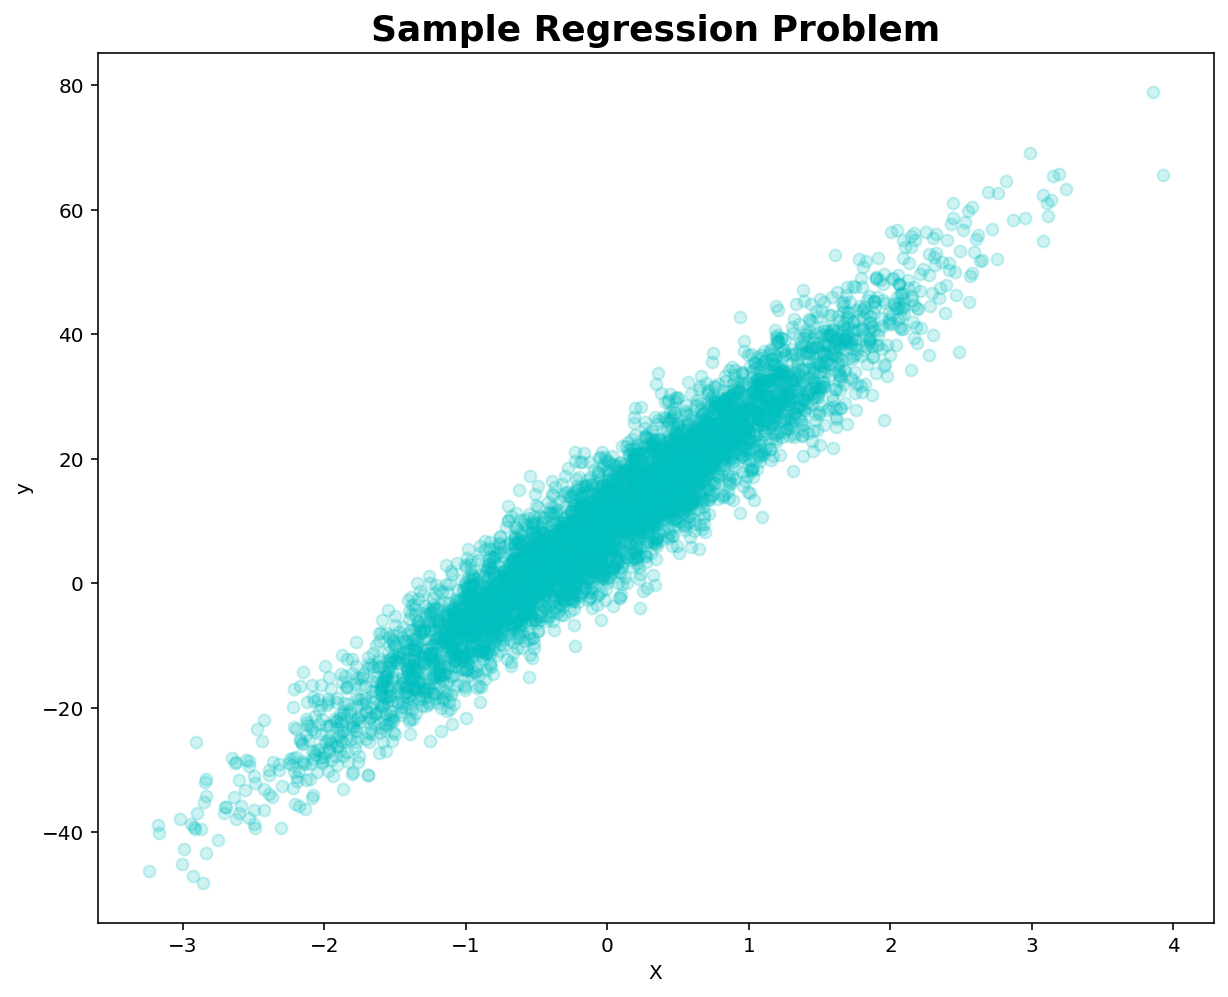

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_numpy, y_numpy, c='c', marker='o', alpha=0.2)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Sample Regression Problem', size=18, weight='bold')

# Show the plot
plt.show()

## Preparing Data for PyTorch

### Defining a DataSet Class

In [4]:
# Define a Dataset
class RegressionDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = torch.from_numpy(X_numpy.astype('float32'))
        self.y = torch.from_numpy(y_numpy.astype('float32'))

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index].unsqueeze(0)

# Instantiate the Dataset
dataset = RegressionDataset(X_numpy, y_numpy)

# Split the Data into Training-Testing
train_dataset, test_dataset = random_split(dataset, lengths=[0.8, 0.2])

### Creating DataLoaders

In [5]:
# Create DataLoaders
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=True
)

## Building a Linear Regression Model

In [6]:
# Define Linear Regression Class
class LinearRegressionSimple(nn.Module):
    def __init__(self, in_features=1, out_features=1):
        super().__init__()
        self.linear = nn.Linear(
            in_features=in_features, 
            out_features=out_features
            )

    def forward(self, x):
        return self.linear(x)
    
model1 = LinearRegressionSimple()

## Defining Loss and Optimizers

In [7]:
criterion = nn.MSELoss()
optimizer = optim.SGD(params=model1.parameters(), lr=0.001)

## Building a Training/Validation Loop

In [8]:
# Defining the Device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
# Instantiating Loss Tracking Lists
train_losses = []
val_losses = []

In [10]:
# Defining a Training Function
def train(model, train_loader, criterion, optimizer, epoch, num_epochs):
    model.train()
    train_loss = 0.0

    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        train_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    avg_loss = train_loss/len(train_loader)
    print(f'Epoch [{epoch + 1:03}/{num_epochs:03}] | Train Loss: {avg_loss:.4f}')
    train_losses.append(train_loss/len(train_loader))

In [11]:
# Defining a Validation Function
def validate(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    avg_loss = val_loss / len(val_loader)
    print(f'Validation Loss: {avg_loss:.4f}')
    val_losses.append(avg_loss)

In [12]:
# Train the Model
num_epochs = 30
model1.to(device)
for epoch in range(num_epochs):
    train(model1, train_loader, criterion, optimizer, epoch, num_epochs)
    validate(model1, test_loader, criterion, device)

Epoch [001/030] | Train Loss: 387.3521
Validation Loss: 334.9213
Epoch [002/030] | Train Loss: 306.3685
Validation Loss: 267.3736
Epoch [003/030] | Train Loss: 243.4057
Validation Loss: 211.1450
Epoch [004/030] | Train Loss: 194.2568
Validation Loss: 169.9798
Epoch [005/030] | Train Loss: 156.8746
Validation Loss: 139.2452
Epoch [006/030] | Train Loss: 127.1425
Validation Loss: 114.4493
Epoch [007/030] | Train Loss: 104.5248
Validation Loss: 94.1704
Epoch [008/030] | Train Loss: 86.7239
Validation Loss: 79.6101
Epoch [009/030] | Train Loss: 73.5331
Validation Loss: 68.4270
Epoch [010/030] | Train Loss: 62.6989
Validation Loss: 58.6173
Epoch [011/030] | Train Loss: 54.3764
Validation Loss: 52.3874
Epoch [012/030] | Train Loss: 47.9661
Validation Loss: 45.9594
Epoch [013/030] | Train Loss: 42.9637
Validation Loss: 41.6003
Epoch [014/030] | Train Loss: 39.1445
Validation Loss: 38.8413
Epoch [015/030] | Train Loss: 36.3491
Validation Loss: 35.7177
Epoch [016/030] | Train Loss: 34.0574
Vali

### Plotting the Model's Performance

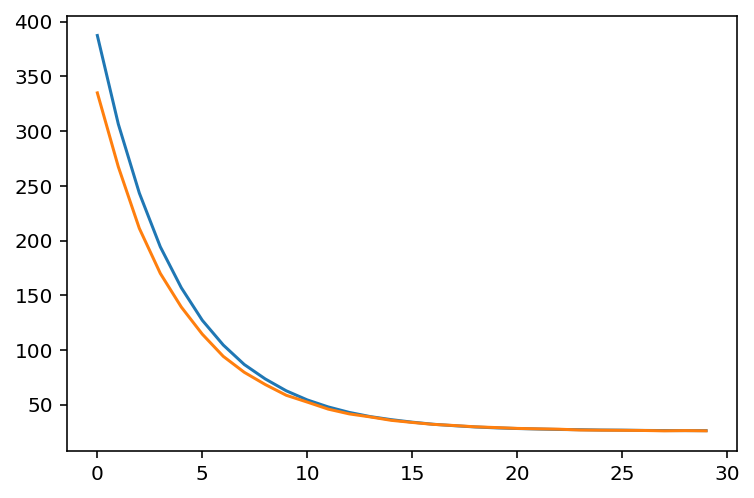

In [13]:
plt.plot(range(len(train_losses)), train_losses, val_losses);

In [14]:
# Printing the Model's Weight and Bias
print(f'{model1.linear.bias=}')
print(f'{model1.linear.weight=}')

model1.linear.bias=Parameter containing:
tensor([9.6626], requires_grad=True)
model1.linear.weight=Parameter containing:
tensor([[16.3771]], requires_grad=True)
